### Thoughts

- Statsmodels provides a variety of built-in tests to explore the underlying attributes of a time series
- We'll learn how to determine if a time series is stationary, if it's independent, and if two series demonstrate causality

# Test for Stationarity

- To determine whether a series is stationary we can use the augmented Dickey-Fuller Test
- This performs a test in the form of a classic null hypothesis test and returns a p value

### Dickey-Fuller Test
- In this test the null hypothesis states that theta = 1 (also called a unit test)
- If a p value is high (>0.05) we fail to reject the null hypothesis
    - "Fail to reject the null hypothesis" basically means we can't rule out that the test has failed

# Test for Causality

### Granger Causality Tests
- The Granger causality test is a hypothesis test to determine if one time series is useful in forecasting another
- While it is fairly easy to measure correlations between series it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time
- This test is used to see if there is an indication of causality, but keep in mind, it could always be some outside factor unaccounted for!

# Evaluating Forecasts

We're already familiar with :
- MAE
- MSE
- RMSE

But we still haven't touched on AIC and BIC

### AIC - Akaike Information Criterion
- Developed by Hirotugu Akaike in 1971
- One of the top 100 most cited publications of all time
- AIC is now such a common metric, many wrtiters no-longer cite the original paper
- The AIC evaluates a collection of models and estimates the quality of each model relative to the others
- Penalties are provided for the number of parameters used in an effort to thwart overfitting

### BIC - Bayesian Information Criterion
- Very similar to AIC, just the mathematics behind the model comparisons utilize a Bayesian approach
- Developed in 1978 by Gideon Schwarz

### Notes
- We will also explore Seasonality Plots

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\airline_passengers.csv",
                 index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\DailyTotalFemaleBirths.csv",
                 index_col='Date', parse_dates=True)
df2.index.freq = 'D'

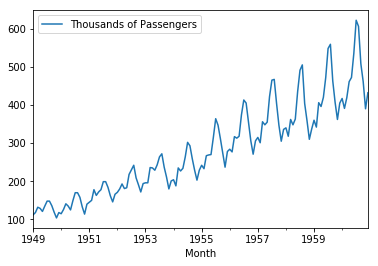

In [2]:
df1.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [5]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [6]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])

In [7]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [8]:
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

### Determine based on the p-value if it's stationary or not

In [13]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


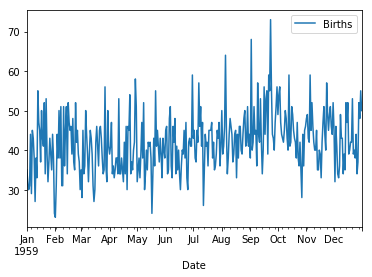

In [11]:
df2.plot()

In [14]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Granger Causality Test

In [24]:
df3 = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\samples.csv",
                 index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [25]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


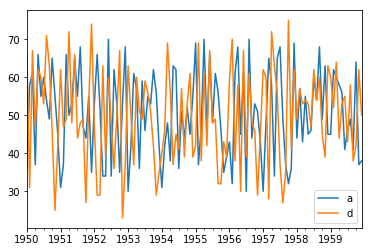

In [26]:
df3[['a', 'd']].plot()

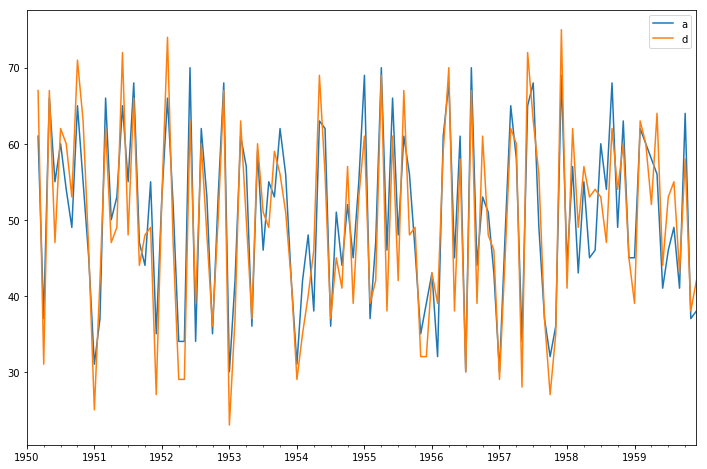

In [28]:
df3['a'].iloc[2:].plot(figsize=(12,8), legend=True)
df3['d'].shift(2).plot(legend=True)

You can see above that after shifting there actually seems to be some allignment... it's possible that d has causality on a

Normally you would need to guess a bunch of shifts to test for allignment... but this could take a long time & is possible you miss it... this is why you need the Granger causality test

In [29]:
from statsmodels.tsa.stattools import grangercausalitytests

In [33]:
grangercausalitytests(df3[['a', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


We have low p-values at 2 or 3... showing causality at these shifts

In [35]:
grangercausalitytests(df3[['b', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


The p-values above are all bigger than 0.05... showing no causality on a range of 3 shifts

In [37]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])

In [38]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


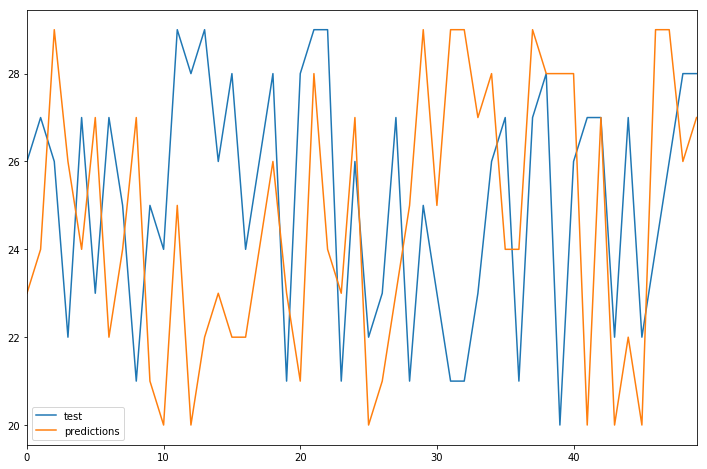

In [39]:
df.plot(figsize=(12, 8))

In [40]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [43]:
mse(df['test'], df['predictions'])

17.02

In [45]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\airline_passengers.csv",
                index_col='Month', parse_dates=True)
df.index.freq = 'MS'

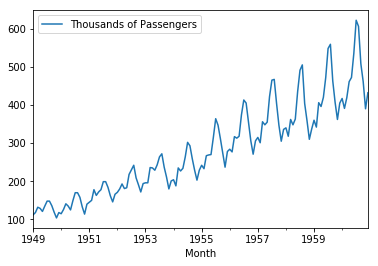

In [47]:
df.plot()

Instead of visually determining the seasonality of your data by zooming in & performing manual research - you can use tsaplots to determine seasonality

In [48]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

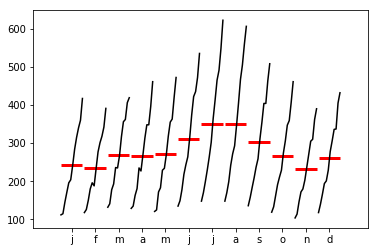

In [49]:
month_plot(df['Thousands of Passengers']);

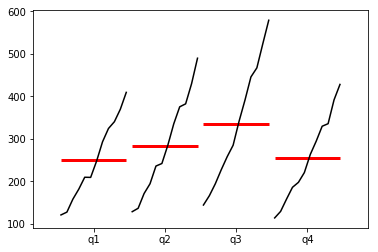

In [55]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()
ax = quarter_plot(dfq);